In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(2019)

[5 3 3 3 4 2 4 5 4 3]


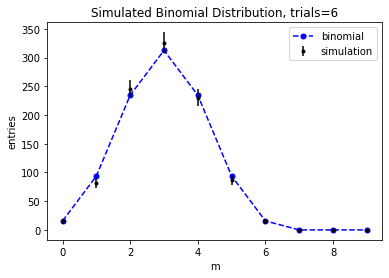

In [3]:
from scipy import stats
LAMBDA = 3            # mean value of random variable m
MMAX   = 10           # maximum value of m to plot
NTRY   = 6            # number of trials
EPS    = LAMBDA/NTRY  # success rate, derived from LAMBDA and NTRY
THROWS = 1000         # number of random variable throws
# throw THROWS random variables m from binomial distribution:
m=np.random.binomial(n=NTRY, p=EPS, size=THROWS)
# print first 10 values for debugging:
print(m[:10])
# create a histogram with integer bins from 0 to MMAX
hm,bins = np.histogram(m,bins=MMAX,range=(0,MMAX))
# for discrete integer data, plot over left edge of each integer bin:
lbins=bins[:-1]
# Calculate Poisson uncertainty from count in each bin:
hunc = np.sqrt(hm)
# Plot the histogram of the simulated Binomial process with errorbars:
plt.errorbar(lbins, hm, yerr=hunc, fmt="k.", 
             label="simulation",zorder=2)
plt.xlabel("m")
plt.ylabel("entries")
plt.title("Simulated Binomial Distribution, trials="+str(NTRY))
#plot the binomial PMF to compare:
pred = THROWS*stats.binom.pmf(lbins,NTRY,EPS)
plt.plot(lbins,pred,"b.--", label="binomial",zorder=1, ms=10)
plt.legend()

plt.savefig("binomial.pdf")

[2 7 2 2 3 1 5 5 8 3]


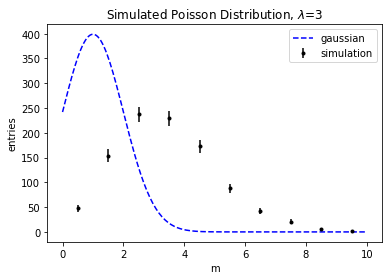

In [4]:
from scipy import stats
LAMBDA = 3            # mean value of random variable x
THROWS = 1000         # number of random throws
XMIN   = 0            # minimum x value for plotting
XMAX   = 10           # maximum x value for plotting
BINS   = 10           # number of bins in histogram
# throw THROWS random variables m from Poisson distribution:
x=np.random.poisson(lam=LAMBDA, size=THROWS)
# print first 10 values for debugging:
print(x[:10])
# create a histogram from specified range and number of bins:
hx,bins = np.histogram(x,bins=BINS,range=(XMIN, XMAX))
# plot (aproximately) continuous data over center of each bin:
cbins=0.5*(bins[1:]+bins[:-1])
# Calculate Poisson uncertainty from count in each bin:
hunc = np.sqrt(hx)
# Plot the histogram of the simulated Binomial process with errorbars:
plt.errorbar(cbins, hx, yerr=hunc, fmt="k.", 
             label="simulation",zorder=2)
plt.xlabel("m")
plt.ylabel("entries")
plt.title("Simulated Poisson Distribution, $\lambda$="+str(LAMBDA))
# choose many x values across range to plot a smooth PDF
xf = np.linspace(XMIN,XMAX,200)
# evaluate the normalized PDF at each x value
pred = (bins[1]-bins[0])*THROWS*stats.norm.pdf(xf,loc=1.0,scale=1.0)
# plot the Gaussian PDF
plt.plot(xf,pred,"b--", label="gaussian",zorder=1)
plt.legend()

plt.savefig("poisson.pdf")

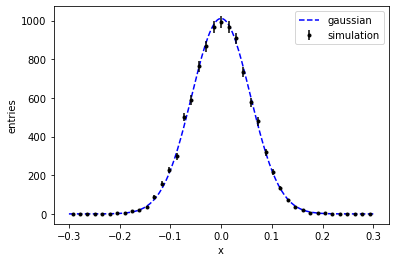

In [5]:
#SOLUTION:  Central Limit Theorem

from scipy import stats
NAVG   = 100
THROWS = 10000
BINS   = 41
XMIN   = -3/np.sqrt(NAVG)
XMAX   = 3/np.sqrt(NAVG)

r = np.random.uniform(low=-1,high=1,size=(THROWS,NAVG))
x = np.sum(r,axis=1)/NAVG

hx,bins = np.histogram(x,bins=BINS,range=(XMIN,XMAX))
# plot (nearly) continuous data over center of each bin:
cbins=0.5*(bins[1:]+bins[:-1])
# Poisson uncertainty in bin counts:
hunc = np.sqrt(hx)
# Plot a histogram of the simulated Binomial process
plt.errorbar(cbins, hx, yerr=hunc, fmt="k.", 
             label="simulation",zorder=2)
plt.xlabel("x")
plt.ylabel("entries")
rms = 1.0/np.sqrt(3*NAVG)
#compare to the Gaussian PDF:
xf = np.linspace(XMIN,XMAX,200)
pred = (bins[1]-bins[0])*THROWS*stats.norm.pdf(xf,loc=0, scale = rms)
plt.plot(xf,pred,"b--", label="gaussian",zorder=1, ms=10)
plt.legend()

[4 3 3 5 3 2 2 3 2 2]


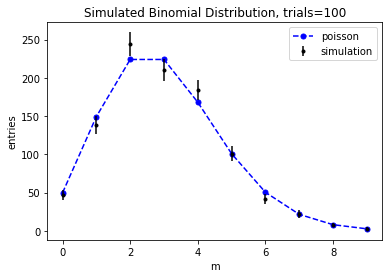

In [6]:
# SOLUTION:  Poisson Limit

from scipy import stats
LAMBDA = 3            # mean value of random variable m
MMAX   = 10           # maximum value of m to plot
NTRY   = 100            # number of trials
EPS    = LAMBDA/NTRY  # success rate, derived from LAMBDA and NTRY
THROWS = 1000         # number of random variable throws
# throw THROWS random variables m from binomial distribution:
m=np.random.binomial(n=NTRY, p=EPS, size=THROWS)
# print first 10 values for debugging:
print(m[:10])
# create a histogram with integer bins from 0 to MMAX
hm,bins = np.histogram(m,bins=MMAX,range=(0,MMAX))
# for discrete integer data, plot over left edge of each integer bin:
lbins=bins[:-1]
# Calculate Poisson uncertainty from count in each bin:
hunc = np.sqrt(hm)
# Plot the histogram of the simulated Binomial process with errorbars:
plt.errorbar(lbins, hm, yerr=hunc, fmt="k.", 
             label="simulation",zorder=2)
plt.xlabel("m")
plt.ylabel("entries")
plt.title("Simulated Binomial Distribution, trials="+str(NTRY))
#plot the binomial PMF to compare:
pred = THROWS*stats.poisson.pmf(lbins,LAMBDA)
plt.plot(lbins,pred,"b.--", label="poisson",zorder=1, ms=10)
plt.legend()

[ 93 101 105 103 101 104  97 110 117  88]


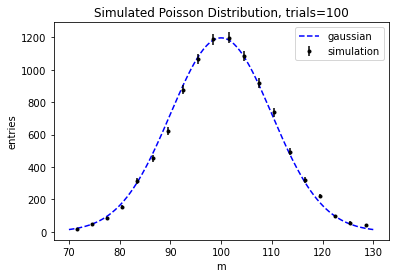

In [7]:
# Solution: Gaussian Limit

from scipy import stats
LAMBDA = 100            # mean value of random variable x
THROWS = 10000         # number of random throws
XMIN   = 70            # minimum x value for plotting
XMAX   = 130           # maximum x value for plotting
BINS   = 20           # number of bins in histogram

# throw THROWS random variables m from Poisson distribution:
x=np.random.poisson(lam=LAMBDA, size=THROWS)
# print first 10 values for debugging:
print(x[:10])
# create a histogram from specified range and number of bins:
hx,bins = np.histogram(x,bins=BINS,range=(XMIN, XMAX))
# plot (aproximately) continuous data over center of each bin:
cbins=0.5*(bins[1:]+bins[:-1])
# Calculate Poisson uncertainty from count in each bin:
hunc = np.sqrt(hx)
# Plot the histogram of the simulated Binomial process with errorbars:
plt.errorbar(cbins, hx, yerr=hunc, fmt="k.", 
             label="simulation",zorder=2)
plt.xlabel("m")
plt.ylabel("entries")
plt.title("Simulated Poisson Distribution, trials="+str(NTRY))

# choose many x values across range to plot a smooth PDF
xf = np.linspace(XMIN,XMAX,200)
# evaluate the normalized PDF at each x value
pred = (bins[1]-bins[0])*THROWS*stats.norm.pdf(xf,loc=LAMBDA,scale=np.sqrt(LAMBDA))
# plot the Gaussian PDF
plt.plot(xf,pred,"b--", label="gaussian",zorder=1)
plt.legend()